In [41]:
#import libraries
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

In [42]:
#retrieve data
def GetData(fileName):
    return pd.read_csv(fileName, header=0,usecols=['Date','Adj Close'], parse_dates=True, index_col='Date')
    %store fileName

In [3]:
data_ivv = GetData('Asset_Dataset/IVV.csv')
data_ivv.head()


,Adj Close
Date,
2014-05-26,NaN
2014-06-02,176.640778
2014-06-09,175.508820
2014-06-16,177.934479
2014-06-23,177.215759


In [4]:
data_ivv.columns = ['IVV adjusted close']

In [5]:
data_ivv.head()

,IVV adjusted close
Date,
2014-05-26,NaN
2014-06-02,176.640778
2014-06-09,175.508820
2014-06-16,177.934479
2014-06-23,177.215759


In [6]:
#Statistical info on IVV
data_ivv.describe()

,IVV adjusted close
count,261.000000
mean,223.273405
std,36.881681
min,172.080475
25%,191.549255
50%,210.913879
75%,260.477875
max,294.202942


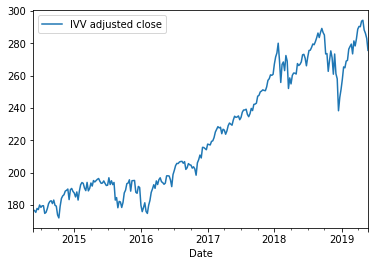

In [7]:
#Plot
data_ivv.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c188e99e8>]],
      dtype=object)

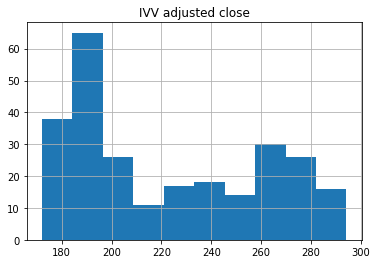

In [8]:
data_ivv.hist()

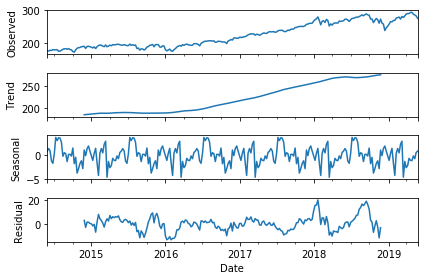

<Figure size 1152x576 with 0 Axes>

In [9]:
data_ivv = data_ivv.dropna()
decomposition = sm.tsa.seasonal_decompose(data_ivv)
fig = decomposition.plot()
plt.figure(figsize=(16, 8))
plt.show()

In [ ]:
### SHOULD THE DATA BE SCALED ??

In [10]:
##differencing (the d term): if time series doesn't meet stationarity requirement
 #check using ADF test - augmented dickey fuller test
    #if p-value > 0.05, differencing & order of differencing required

from statsmodels.tsa.stattools import adfuller
from numpy import log


In [11]:
data_ivv.isna().sum()

IVV adjusted close    0
dtype: int64

In [12]:
#turn data into 1D array to feed into ADF test
data_ivv_1 = data_ivv.iloc[:,0].values

In [13]:
data_ivv_1

array([176.640778, 175.50882 , 177.934479, 177.215759, 180.068802,
       178.615738, 179.554382, 179.617538, 174.861084, 175.519989,
       177.821472, 180.926239, 182.280106, 182.704285, 180.944321,
       183.101395, 179.87027 , 179.380066, 173.921173, 172.080475,
       179.253082, 184.06813 , 185.673172, 186.416702, 188.647385,
       189.13707 , 189.916885, 183.397095, 189.526947, 190.288666,
       188.447769, 187.463318, 185.047653, 188.137863, 183.106033,
       188.6483  , 192.595413, 193.926285, 193.443161, 190.49881 ,
       188.940033, 194.026596, 188.785065, 190.289612, 193.651016,
       191.755081, 195.162292, 194.28299 , 195.11647 , 195.92247 ,
       196.42627 , 194.704315, 193.431183, 193.632721, 194.951645,
       193.412872, 192.107697, 192.291885, 196.887589, 192.715515,
       195.027222, 192.651062, 193.986496, 183.100449, 184.638519,
       178.357422, 182.280823, 181.940033, 178.532379, 181.584244,
       187.5392  , 189.233994, 193.244034, 193.60524 , 195.633

In [14]:
result = adfuller(data_ivv_1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.693766
p-value: 0.848358


In [15]:
## use grid search method to find the best P D Q
#https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_ivv_1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3559.5781183804556
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3108.785104995664
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1968.0426161591865
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1878.7199686987265
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1934.1959342271573
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1887.4203937543098
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1883.661711632527
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1877.8132404213093
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3198.5093585774566
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2767.8443379732316
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1784.9447335847412
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1697.0111915977661
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1770.4918820249418


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1766.892337232569
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1706.644567003089
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1694.564036506667
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1486.8651344377872
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1428.720730366453
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1593.3028514912617
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1387.335978201812
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1433.5076884498374
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1429.5138022733377
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1453.0878691920082
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1389.3359772511935
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1480.2458329065548
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1422.3127874258935
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1585.7860751529583
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1380.3188612263273
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1432.0027256057726
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1423.4080825039396
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1448.73575542108

In [17]:
#optimal value is one with lowest AIC
    #here: (0, 1, 1)x(0, 1, 1, 12) 
mod = sm.tsa.statespace.SARIMAX(data_ivv_1,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1315      0.052     -2.532      0.011      -0.233      -0.030
ma.S.L12      -0.9793      0.184     -5.331      0.000      -1.339      -0.619
sigma2        18.8079      3.219      5.843      0.000      12.499      25.116


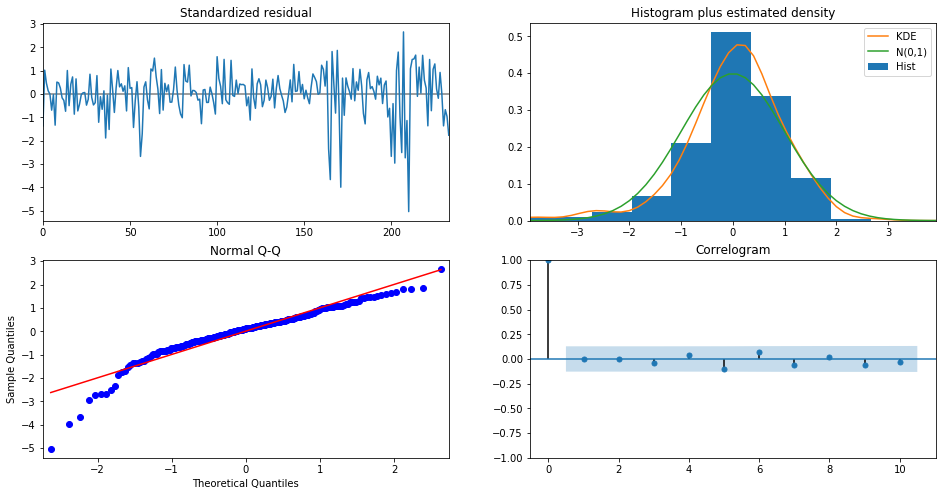

In [18]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [19]:
# fit model
model = ARIMA(data_ivv_1, order=(15,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  259
Model:                ARIMA(15, 2, 0)   Log Likelihood                -747.391
Method:                       css-mle   S.D. of innovations              4.317
Date:                Sat, 10 Aug 2019   AIC                           1528.781
Time:                        02:24:52   BIC                           1589.247
Sample:                             2   HQIC                          1553.092
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0060      0.033     -0.179      0.858      -0.071       0.059
ar.L1.D2.y     -1.0087      0.063    -16.079      0.000      -1.132      -0.886
ar.L2.D2.y     -0.9425      0.089    -10.535    

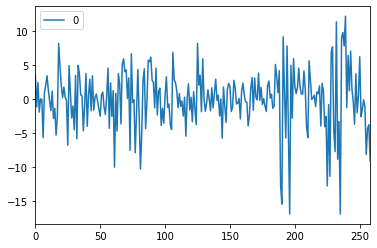

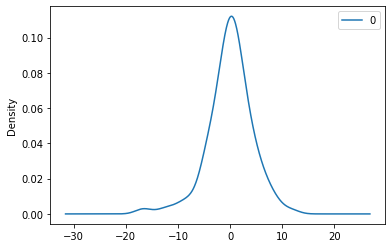

                0
count  259.000000
mean     0.009344
std      4.331076
min    -16.957205
25%     -1.902998
50%      0.219931
75%      2.382781
max     12.229279


In [20]:
# graph 1 - line of residual errors, suggesting some trend is not caputured by the model
# graph 2 - gaussian plot of residual error
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=242.103839, expected=242.417084
predicted=243.261915, expected=242.955032
predicted=242.739624, expected=247.270050
predicted=247.650266, expected=247.772125
predicted=248.050846, expected=249.915512
predicted=249.746520, expected=250.456161
predicted=251.276093, expected=251.199600
predicted=251.474230, expected=250.842316
predicted=251.527101, expected=250.668564
predicted=251.169451, expected=253.043671
predicted=253.394502, expected=257.069733
predicted=257.062065, expected=258.073792
predicted=258.077761, expected=260.477875
predicted=260.581125, expected=260.159302
predicted=261.041758, expected=260.793243
predicted=261.159981, expected=267.079041
predicted=267.299241, expected=271.521790
predicted=271.504870, expected=274.024475
predicted=273.773152, expected=280.009583
predicted=280.650795, expected=269.213165
predicted=271.159253, expected=255.768494
predicted=256.383825, expected=266.846252
predicted=269.433055, expected=268.427429
predicted=268.265794, expected=263

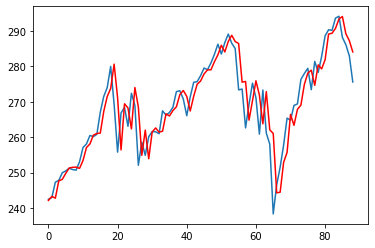

In [21]:
X = data_ivv.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [22]:
##out of time cross validation

In [48]:
df = pd.DataFrame(data_ivv_1)

In [49]:
# Create Training and Test
train = df[:85]
test = df[85:]

In [50]:
# Build Model
model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf



TypeError: can only concatenate str (not "int") to str

In [47]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: Length of passed values is 15, index implies 176

In [ ]:
#Fn for ARIMA model and fit and forecast stock data
    #https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html
        #Fits ARIMA(p,d,q) by exact max likelihood using Kalman filter and returns estimated values 
def ARIMA_Forecast(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [ ]:
Num_Elements = len(data_ivv)

In [ ]:
#Split training and testing data 80/20

train_size = int(Num_Elements * 0.8)
train_data = data_ivv[0:train_size]
test_data = data_ivv[train_size:Num_Elements]

In [ ]:
#create arrays storing actual, predictions
Actual = [x for x in train_data]
Predictions = list()

In [ ]:
#Predict values with ARIMA 
for i in range(len(test_data)):
    Actual_Val =  test_data[i]
    #forecasting value
    Prediction = ARIMA_Forecast(Actual, 3,1,0)    
    print('Actual=%f, Predicted=%f' % (Actual_Val, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(Actual_Val)


In [ ]:
#Print MSE to see how good the model is
Error = mean_squared_error(test_data, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.2f' % Error)


In [ ]:
# plot
plt.plot(test_data)
plt.plot(Predictions, color='red')
plt.show()